Importing Necessary libraries


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd

In [4]:
!kaggle datasets download -d anmolkumar/health-insurance-cross-sell-prediction 

 62% 4.00M/6.47M [00:00<00:00, 6.06MB/s]
100% 6.47M/6.47M [00:01<00:00, 6.67MB/s]


In [5]:
!unzip /content/health-insurance-cross-sell-prediction.zip

Archive:  /content/health-insurance-cross-sell-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Reading the Dataset


In [49]:
train=pd.read_csv("train.csv")
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


Checking for missing values


In [50]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Checking for unique values

In [51]:
for i in train.columns:
  print("No of Unique values in ",i," - ",len(np.unique(train[i])))

No of Unique values in  id  -  381109
No of Unique values in  Gender  -  2
No of Unique values in  Age  -  66
No of Unique values in  Driving_License  -  2
No of Unique values in  Region_Code  -  53
No of Unique values in  Previously_Insured  -  2
No of Unique values in  Vehicle_Age  -  3
No of Unique values in  Vehicle_Damage  -  2
No of Unique values in  Annual_Premium  -  48838
No of Unique values in  Policy_Sales_Channel  -  155
No of Unique values in  Vintage  -  290
No of Unique values in  Response  -  2


Dropping unnecessary columns

In [52]:
train=train.drop(['id'],axis=1)

Univariate Analysis

Gender column

In [53]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

<BarContainer object of 2 artists>

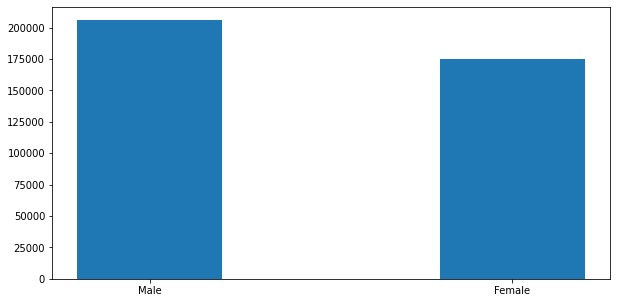

In [54]:
import matplotlib.pyplot as plt
x = list(train['Gender'].value_counts().index)
y = list(train['Gender'].value_counts().values)
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, width = 0.4)


In [55]:
train["Gender"] = np.where(train["Gender"] == "Male", 1,0)

Age Column Univariate Analysis

<BarContainer object of 66 artists>

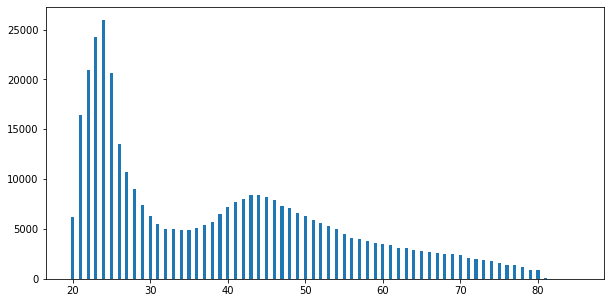

In [56]:
x = list(train['Age'].value_counts().index)
y = list(train['Age'].value_counts().values)
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, width = 0.4)

Since we see 3 different sets of distribution, we bin the groups based on normal distribution


In [57]:
train["Age"] = np.where(train["Age"] <= 32, 1, train["Age"])
train.loc[(train["Age"] > 32) & (train["Age"] < 55), "Age"] = 2

train["Age"] = np.where(train["Age"] >= 55, 3, train["Age"])


Region code Column Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

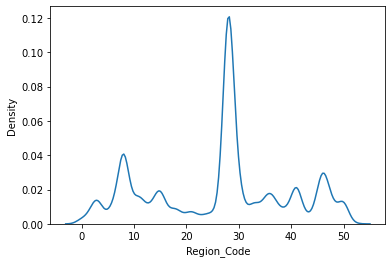

In [58]:
import seaborn as sns
sns.distplot(train['Region_Code'], hist=False, kde=True) 


We find mixed distribution and cannot be grouped


Previously Insured Column Univariate Analysis

<BarContainer object of 2 artists>

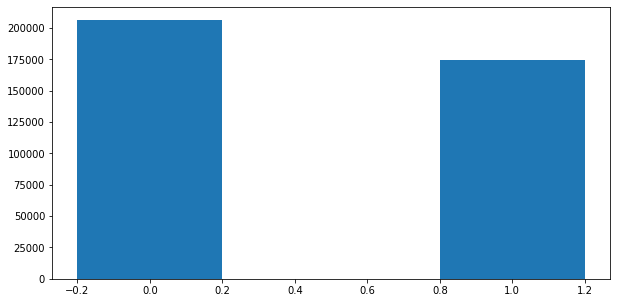

In [59]:
import matplotlib.pyplot as plt
x = list(train['Previously_Insured'].value_counts().index)
y = list(train['Previously_Insured'].value_counts().values)
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, width = 0.4)


Vehicle Age Column Univariate Analysis

<BarContainer object of 3 artists>

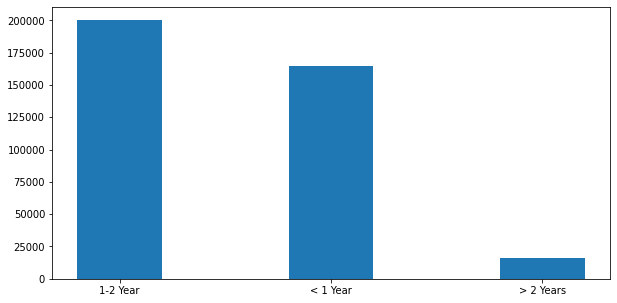

In [60]:
import matplotlib.pyplot as plt
x = list(train['Vehicle_Age'].value_counts().index)
y = list(train['Vehicle_Age'].value_counts().values)
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, width = 0.4)


Converting the column into values since easy for model to understand

In [61]:
train["Vehicle_Age"] = np.where(train["Vehicle_Age"]=='1-2 Year', 1.5, train["Vehicle_Age"])
train["Vehicle_Age"] = np.where(train["Vehicle_Age"]=='< 1 Year', 0.5, train["Vehicle_Age"])
train["Vehicle_Age"] = np.where(train["Vehicle_Age"]=='> 2 Years', 2.5, train["Vehicle_Age"])


Vehicle Damage Column Univariate Analysis

<BarContainer object of 2 artists>

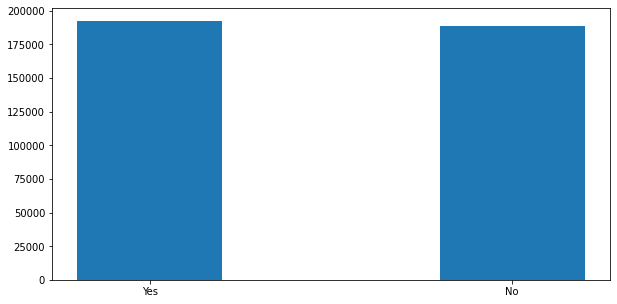

In [62]:
import matplotlib.pyplot as plt
x = list(train['Vehicle_Damage'].value_counts().index)
y = list(train['Vehicle_Damage'].value_counts().values)
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, width = 0.4)

COnverting text to Number


In [63]:
train["Vehicle_Damage"] = np.where(train["Vehicle_Damage"] == 'Yes', 1, 0)

Annual Premium Calculate

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

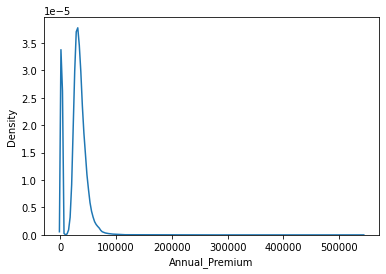

In [64]:
sns.distplot(train['Annual_Premium'], hist=False, kde=True) 

In [65]:
train["Annual_Premium"].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium'>

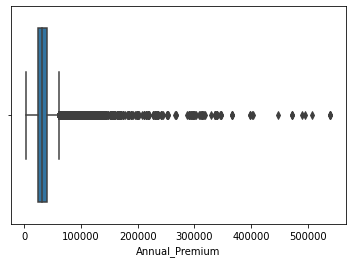

In [66]:
sns.boxplot(train['Annual_Premium'])

Policy Sales Channel Column Univariate Analysis

<BarContainer object of 155 artists>

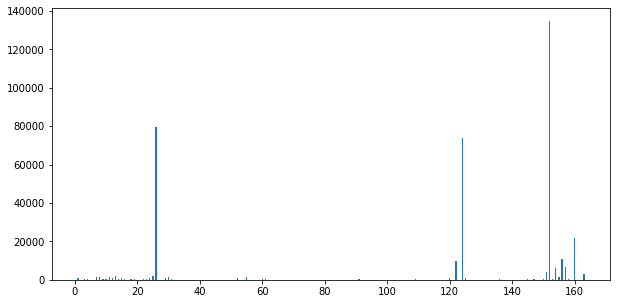

In [67]:
import matplotlib.pyplot as plt
x = list(train['Policy_Sales_Channel'].value_counts().index)
y = list(train['Policy_Sales_Channel'].value_counts().values)
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, width = 0.4)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

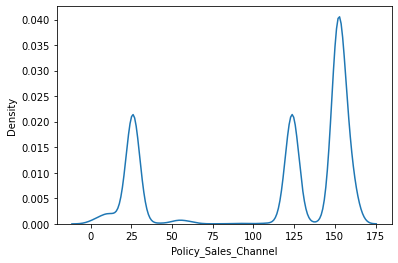

In [68]:
sns.distplot(train['Policy_Sales_Channel'], hist=False, kde=True) 

Looing at the distribution, we find 3 different types of channel

In [69]:
train["Policy_Sales_Channel"] = np.where(train["Policy_Sales_Channel"] <= 75, 1, train["Policy_Sales_Channel"])
train.loc[(train["Policy_Sales_Channel"] > 75) & (train["Policy_Sales_Channel"] < 137), "Policy_Sales_Channel"] = 2

train["Policy_Sales_Channel"] = np.where(train["Policy_Sales_Channel"] >= 137, 3, train["Policy_Sales_Channel"])


Vintage Column Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

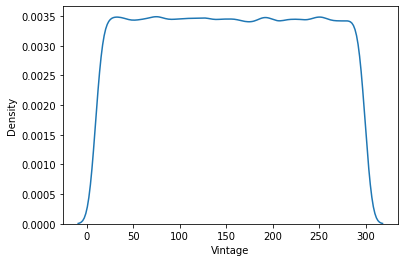

In [70]:
sns.distplot(train['Vintage'], hist=False, kde=True) 

In [71]:
train.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [72]:
train.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.147865,-0.018374,0.000604,-0.081932,0.091606,0.003673,-0.140067,-0.002517,0.052440
Age,0.147865,1.000000,-0.069157,0.042931,-0.277727,0.289644,0.057902,-0.658634,-0.001283,0.127483
Driving_License,-0.018374,-0.069157,1.000000,-0.001081,0.014969,-0.016622,-0.011906,0.046278,-0.000848,0.010155
Region_Code,0.000604,0.042931,-0.001081,1.000000,-0.024659,0.028235,-0.010588,-0.045222,-0.002750,0.010570
Previously_Insured,-0.081932,-0.277727,0.014969,-0.024659,1.000000,-0.824143,0.004269,0.276174,0.002537,-0.341170
Vehicle_Damage,0.091606,0.289644,-0.016622,0.028235,-0.824143,1.000000,0.009349,-0.283018,-0.002064,0.354400
Annual_Premium,0.003673,0.057902,-0.011906,-0.010588,0.004269,0.009349,1.000000,-0.126453,-0.000608,0.022575
Policy_Sales_Channel,-0.140067,-0.658634,0.046278,-0.045222,0.276174,-0.283018,-0.126453,1.000000,0.000967,-0.169712
Vintage,-0.002517,-0.001283,-0.000848,-0.002750,0.002537,-0.002064,-0.000608,0.000967,1.000000,-0.001050
Response,0.052440,0.127483,0.010155,0.010570,-0.341170,0.354400,0.022575,-0.169712,-0.001050,1.000000


In [73]:
train["Policy_Sales_Channel"]=train['Policy_Sales_Channel'].astype(str)
train['Vehicle_Age']=train["Vehicle_Age"].astype(float)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,2,1,28.0,0,2.5,1,40454.0,1.0,217,1
1,1,3,1,3.0,0,1.5,0,33536.0,1.0,183,0
2,1,2,1,28.0,0,2.5,1,38294.0,1.0,27,1
3,1,1,1,11.0,1,0.5,0,28619.0,3.0,203,0
4,0,1,1,41.0,1,0.5,0,27496.0,3.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,3,1,26.0,1,1.5,0,30170.0,1.0,88,0
381105,1,1,1,37.0,1,0.5,0,40016.0,3.0,131,0
381106,1,1,1,30.0,1,0.5,0,35118.0,3.0,161,0
381107,0,3,1,14.0,0,2.5,1,44617.0,2.0,74,0


In [74]:
cols_to_transform=['Policy_Sales_Channel']
dummies = pd.get_dummies(train[cols_to_transform])
train = pd.concat([train, dummies], axis=1)

# drop the original categorical columns
train.drop(cols_to_transform, axis=1, inplace=True)


In [75]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Policy_Sales_Channel_1.0,Policy_Sales_Channel_2.0,Policy_Sales_Channel_3.0
0,1,2,1,28.0,0,2.5,1,40454.0,217,1,1,0,0
1,1,3,1,3.0,0,1.5,0,33536.0,183,0,1,0,0
2,1,2,1,28.0,0,2.5,1,38294.0,27,1,1,0,0
3,1,1,1,11.0,1,0.5,0,28619.0,203,0,0,0,1
4,0,1,1,41.0,1,0.5,0,27496.0,39,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,3,1,26.0,1,1.5,0,30170.0,88,0,1,0,0
381105,1,1,1,37.0,1,0.5,0,40016.0,131,0,0,0,1
381106,1,1,1,30.0,1,0.5,0,35118.0,161,0,0,0,1
381107,0,3,1,14.0,0,2.5,1,44617.0,74,0,0,1,0


It is clear that the distribution is not normal therefore we use min max scalar


In [76]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])
train[['Region_Code']] = mm.fit_transform(train[['Region_Code']])
train[['Vintage']] = mm.fit_transform(train[['Vintage']])

Data Splitting for training

In [77]:
X=train.drop(['Response'],axis=1)
y=train['Response']

Over sample

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train)

Model Building

Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred=lg.predict_proba(x_test)

In [206]:

y_pred_val=[]
for i in y_pred:
  if(i[1]>0.65):
    y_pred_val.append(1)
  else:
    y_pred_val.append(0)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     83603
           1       0.29      0.80      0.42     11675

    accuracy                           0.73     95278
   macro avg       0.62      0.76      0.62     95278
weighted avg       0.88      0.73      0.77     95278



In [207]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred_val)

array([[60201, 23402],
       [ 2327,  9348]])

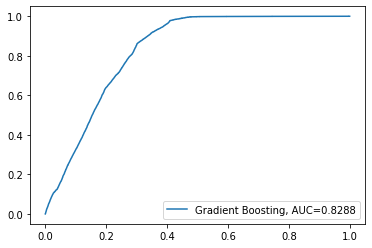

In [209]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_test, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict_proba(x_test)

In [212]:
y_pred_val=[]
for i in y_pred:
  if(i[1]>0.25):
    y_pred_val.append(1)
  else:
    y_pred_val.append(0)

In [213]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred_val)

array([[58786, 24817],
       [ 2479,  9196]])

In [214]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     83603
           1       0.27      0.79      0.40     11675

    accuracy                           0.71     95278
   macro avg       0.61      0.75      0.61     95278
weighted avg       0.88      0.71      0.76     95278



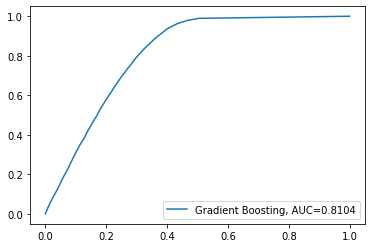

In [215]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_test, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

XgBoost

In [216]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict_proba(x_test)

In [217]:
y_pred_val=[]
for i in y_pred:
  if(i[1]>0.45):
    y_pred_val.append(1)
  else:
    y_pred_val.append(0)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     83603
           1       0.30      0.79      0.43     11675

    accuracy                           0.74     95278
   macro avg       0.63      0.76      0.63     95278
weighted avg       0.88      0.74      0.78     95278



In [218]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred_val)

array([[61491, 22112],
       [ 2416,  9259]])

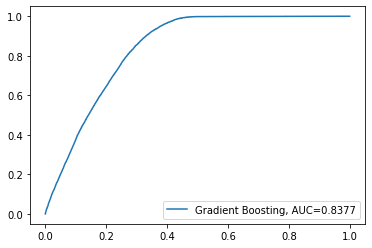

In [219]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_test, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

Xgboost and Logistic Regression performed well. Therefore we try to Calibrate those models

SInce Logistic Regression model is simpler and robust,